# Data vizualization practical 1

In [2]:
import polars as pl
from plotnine import *

In [1]:
ut = pl.read_csv("https://raw.githubusercontent.com/lindahartman/LUDataLiteracy/refs/heads/main/data/utrecht_2025.csv", try_parse_dates=True)
kc = pl.read_csv('https://raw.githubusercontent.com/lindahartman/LUDataLiteracy/refs/heads/main/data/kc_house_data.csv', try_parse_dates=True)

NameError: name 'pl' is not defined

In [3]:
ut

id,zip_code4,zip_code6,zip_code6_id,house_type,lot_area,house_area,garden_size,rooms,bathrooms,x_coor,y_coor,build_year,retail_value,asking_price,energy_label,energy_eff,valuation_date,street,subdistrict,district,city,dist_from_train
i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,f64,i64,i64,f64,str,i64,date,str,str,str,str,f64
5110,3512,"""3512EA""","""3512EA110""","""appartement""",0,85,19,2,2,52.0946,5.1252,1800,447,445.0,null,null,2024-04-24,"""Keizerstraat""","""Binnenstad woongebied""","""Binnenstad""","""Utrecht""",1.21
5114,3532,"""3532HH""","""3532HH114""","""woonhuis""",90,110,null,6,2,52.0937,5.0961,1936,750,795.0,null,null,2024-07-03,"""Vleutenseweg""","""Lombok-Leidseweg""","""West""","""Utrecht""",1.12
5154,3511,"""3511VG""","""3511VG154""","""woonhuis""",80,84,16,2,1,52.0878,5.1211,1320,490,495.0,null,null,2024-06-18,"""Zwaansteeg""","""Binnenstad city""","""Binnenstad""","""Utrecht""",0.75
5011,3553,"""3553BM""","""3553BM011""","""appartement""",0,86,0,4,1,52.1111,5.0879,1931,441,389.0,"""D""",0,2024-05-02,"""Edisonstraat""","""Zuilen-west""","""Noord-West""","""Utrecht""",2.91
5012,3553,"""3553CM""","""3553CM012""","""appartement""",0,63,30,3,1,52.1108,5.0864,1926,435,395.0,"""D""",0,2024-08-28,"""Amperestraat""","""Zuilen-west""","""Noord-West""","""Utrecht""",2.94
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
5144,3453,"""3453VN""","""3453VN144""","""woonhuis""",107,106,26,5,1,52.0791,5.0176,2000,490,429.0,"""A""",1,2024-04-26,"""Kruiswortel""","""Veldhuizen""","""Vleuten-De Meern""","""De Meern""",6.4
5145,3544,"""3544VK""","""3544VK145""","""woonhuis""",125,87,null,4,1,52.0904,5.047,2001,560,490.0,"""A""",1,2024-09-03,"""Zandooghof""","""Het Zand-Parkwijk-Langerak""","""Leidsche Rijn""","""Utrecht""",4.32
5146,3554,"""3554CS""","""3554CS146""","""woonhuis""",67,116,20,5,1,52.1118,5.0991,1998,654,550.0,"""A""",1,2024-10-28,"""Adriaan Menninckkwartier""","""Zuilen-noord en -oost""","""Noord-West""","""Utrecht""",2.68


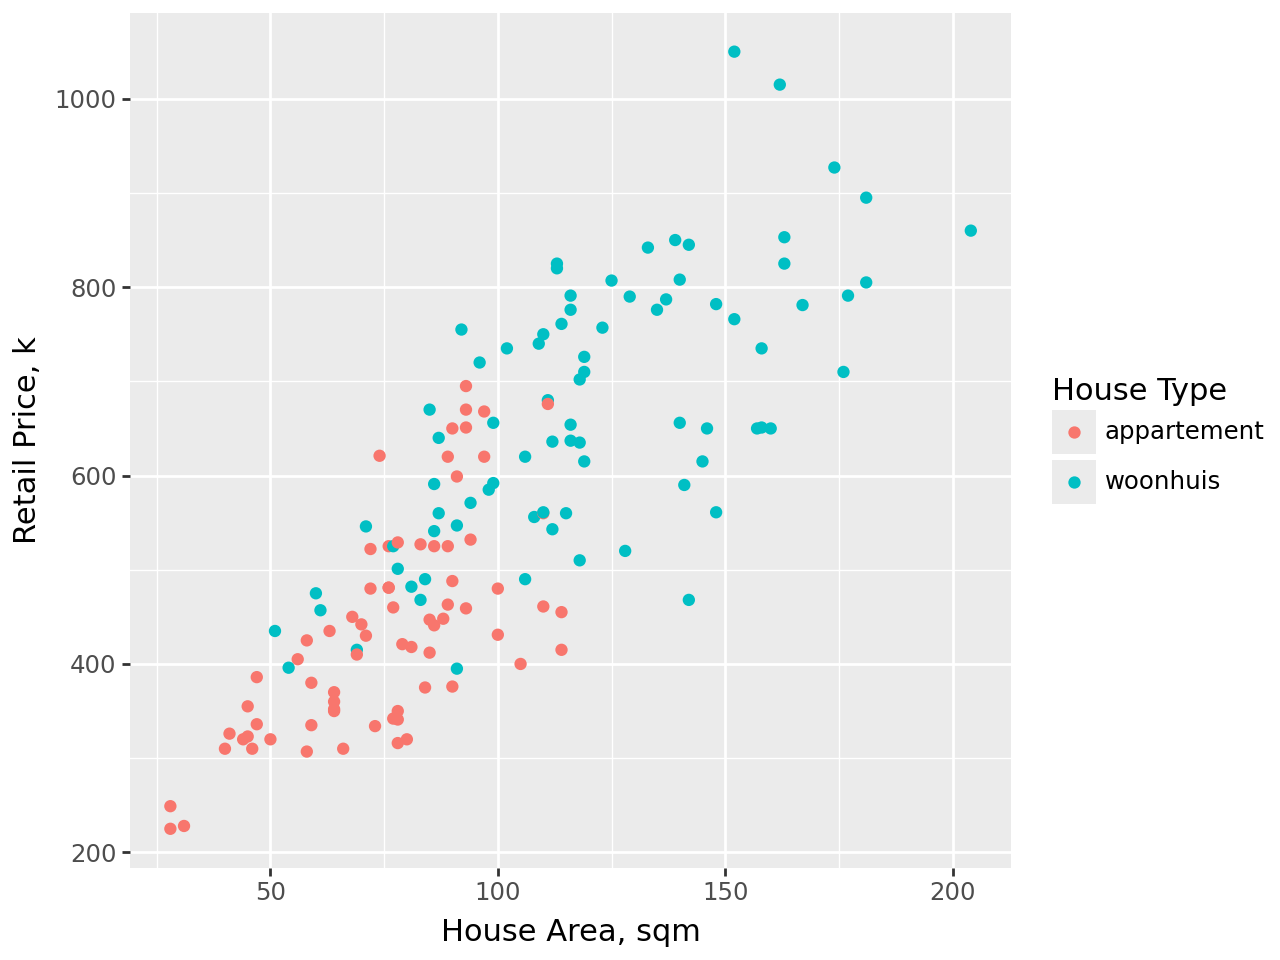

In [6]:
(
    ggplot(ut)+
    geom_point(aes(x='house_area', y='retail_value', color='house_type'))+
               labs(x='House Area, sqm', y='Retail Price, k', color='House Type')
            
)

# Challenge 2

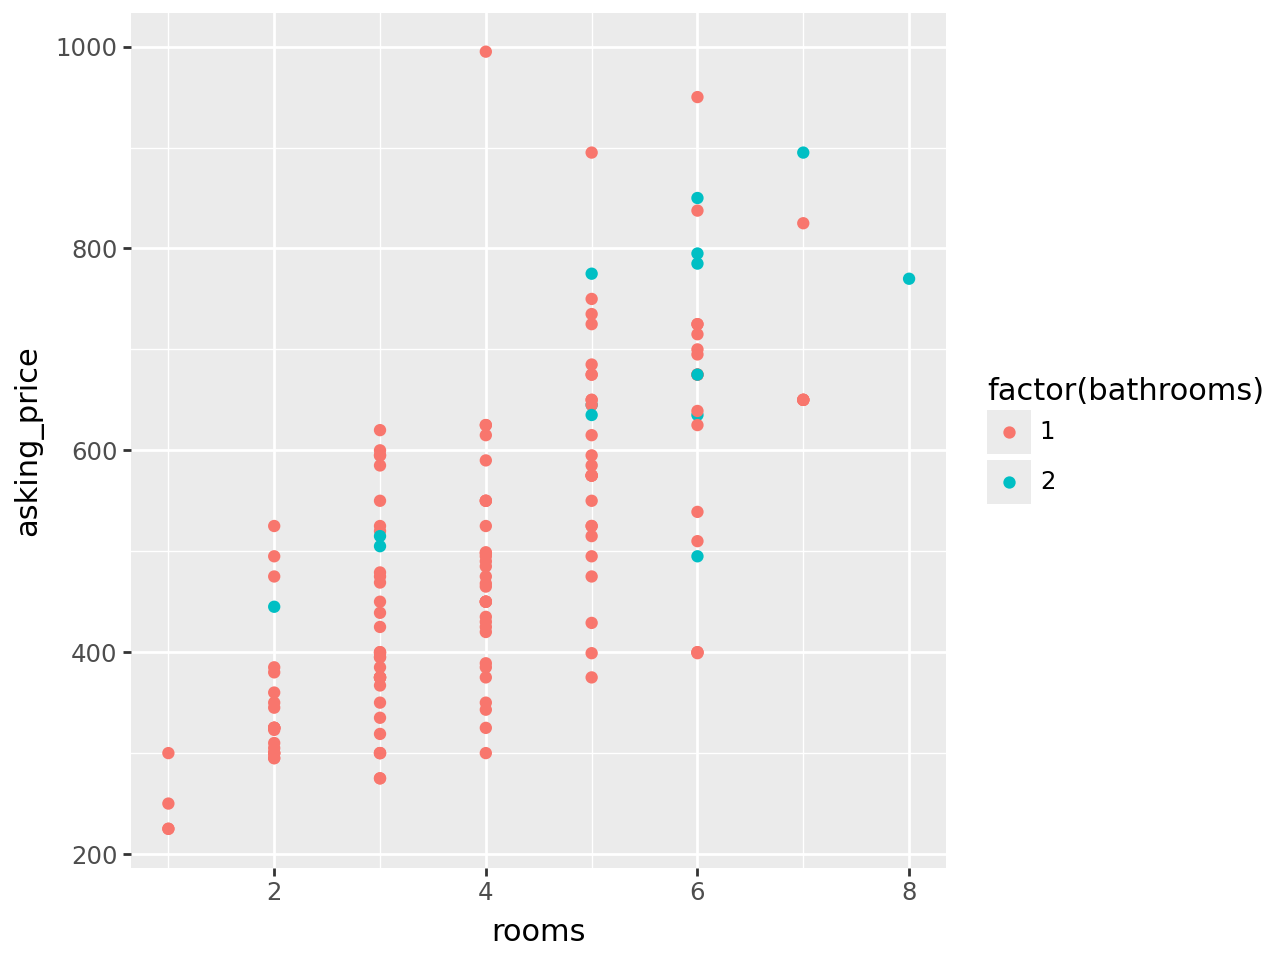

In [12]:
(
    ggplot(ut) +
    geom_point(aes(x="rooms", y="asking_price", color="factor(bathrooms)"))
)

# Challenge 3

C:\Users\augus\OneDrive - Lund University\Python - dataanalys\.venv\Lib\site-packages\plotnine\layer.py:374: PlotnineWarning: geom_point : Removed 145 rows containing missing values.


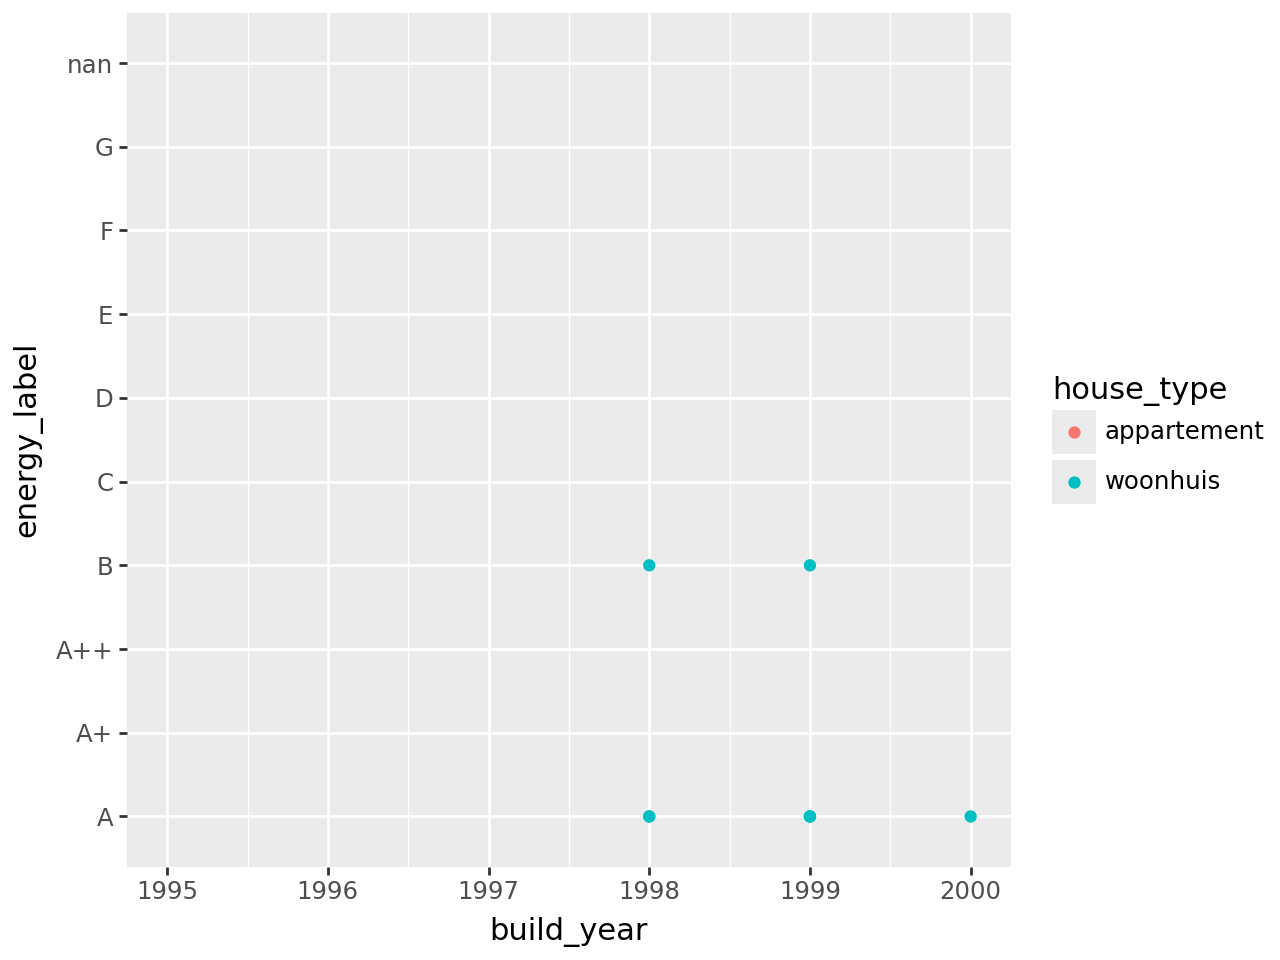

In [22]:
(
    ggplot(ut) +
    geom_point(aes(x='build_year', y='energy_label', color='house_type'))+
    scale_x_continuous(limits=[1995, 2000])
              )

# Challenge 4

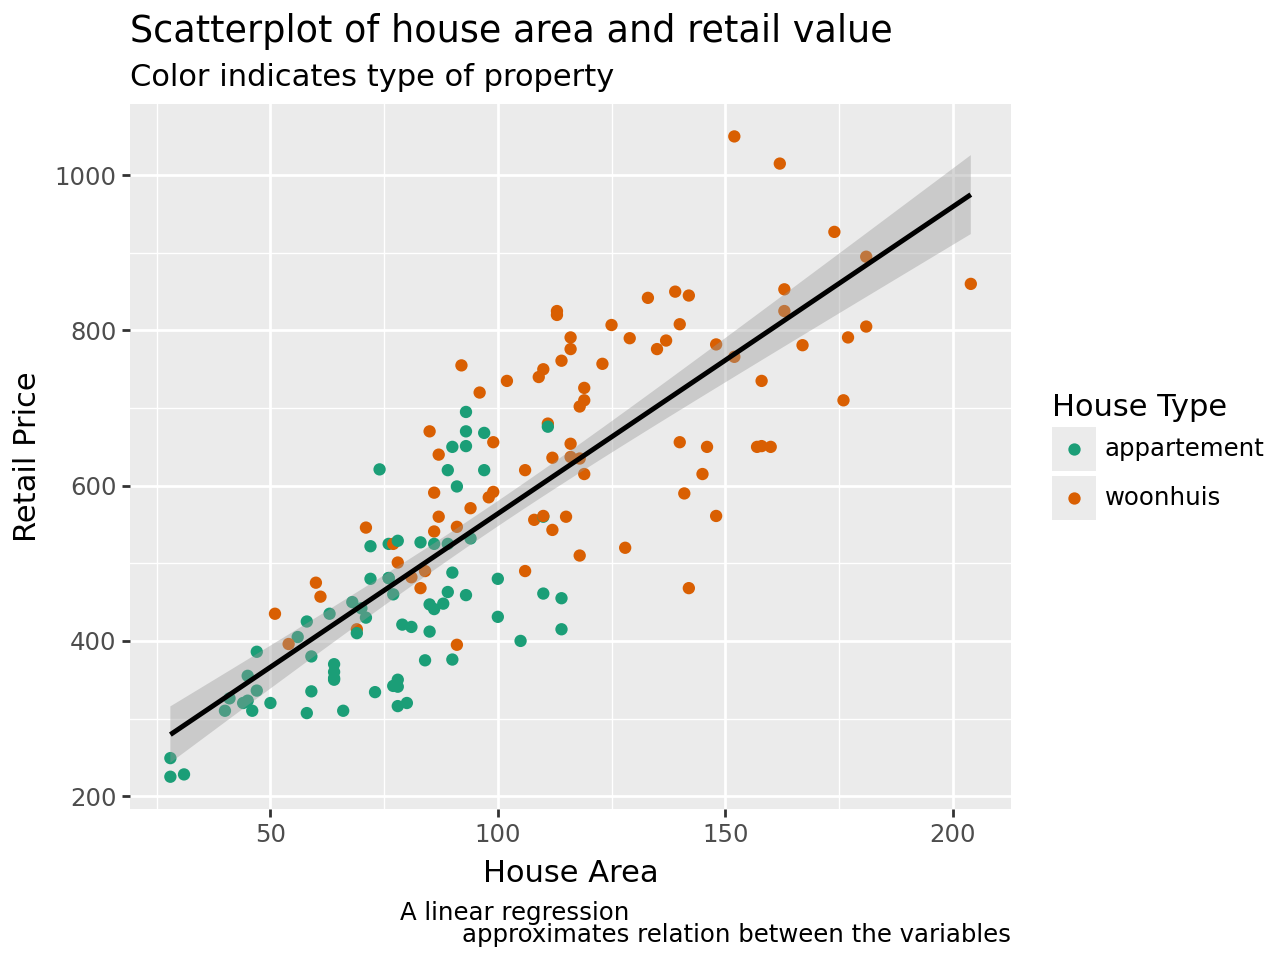

In [39]:
(
    ggplot(ut, aes(x="house_area", y="retail_value")) +
    geom_point(aes(color="house_type")) +
    geom_smooth(method="lm") +
    labs(
        title="Scatterplot of house area and retail value",
        subtitle="Color indicates type of property",
        caption="""A linear regression
        approximates relation between the variables""",
        x="House Area",
        y="Retail Price",
        color="House Type")+
    scale_color_brewer("qualitative", palette="Dark2")
)

# Challenge 5

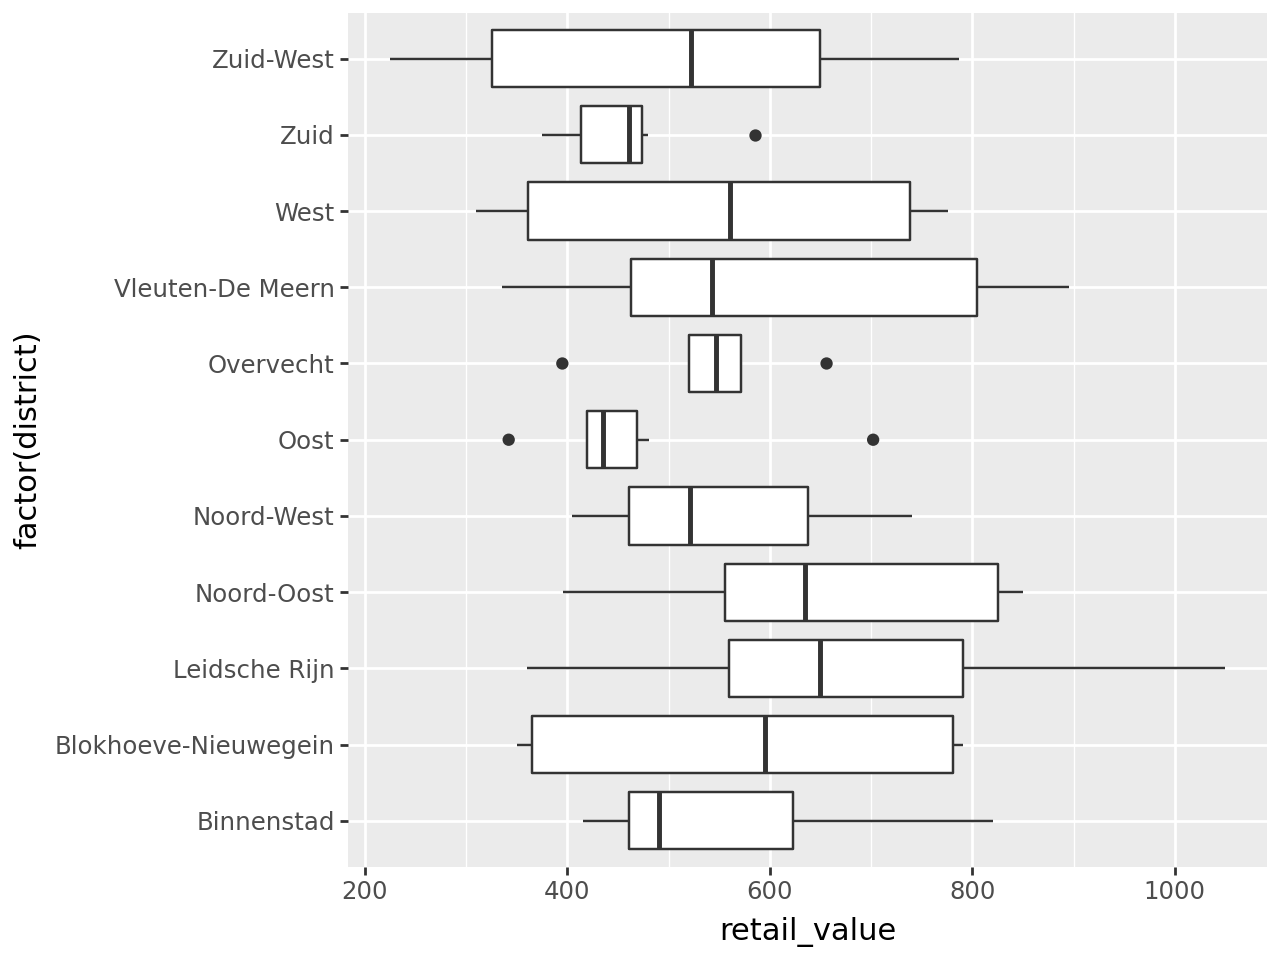

In [44]:
(
    ggplot(ut)+
    geom_boxplot(aes(x='factor(district)', y='retail_value', group='district'))+
    coord_flip(expand=True)
)

# Challenge 6

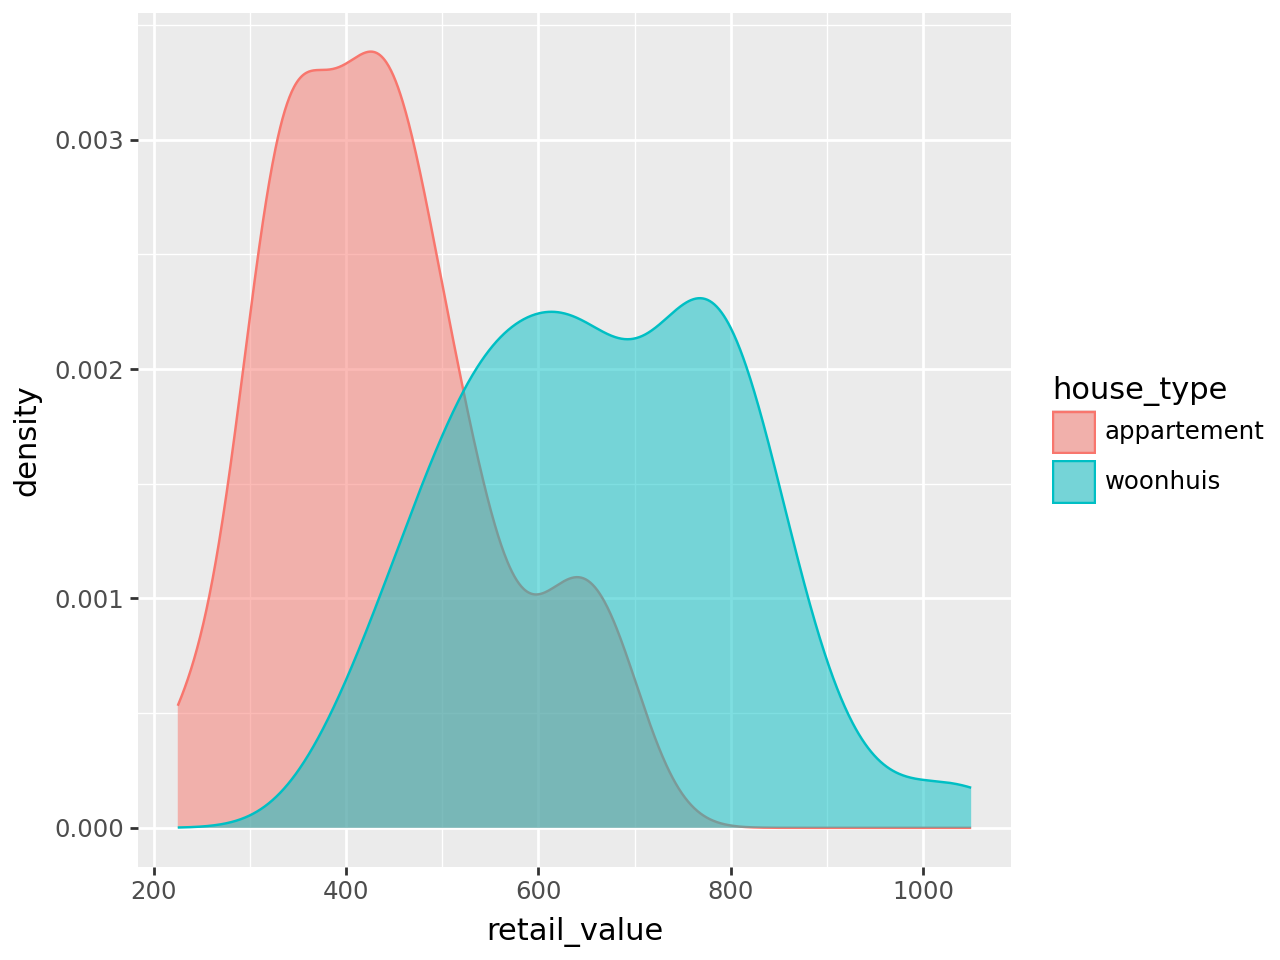

In [47]:
(
    ggplot(ut) +
    geom_density(aes(x="retail_value", color="house_type", fill="house_type"),
                alpha=0.5)
)

# Challenge 7

In [3]:
import polars as pl
from plotnine import *

In [4]:
ut = pl.read_csv("https://raw.githubusercontent.com/lindahartman/LUDataLiteracy/refs/heads/main/data/utrecht_2025.csv", try_parse_dates=True)
kc = pl.read_csv('https://raw.githubusercontent.com/lindahartman/LUDataLiteracy/refs/heads/main/data/kc_house_data.csv', try_parse_dates=True)

In [5]:
(
    ggplot(ut, aes(x='house_area', y='retail_value')+
    geom_point()
          )
)

PlotnineError: "Cannot add layer to object of type <class 'plotnine.mapping.aes.aes'>"

# Kings Conty dataset

In [8]:
kc.describe()

statistic,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,district
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",21613.0,"""21613""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,"""21613"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",4.5803e9,"""2014-10-29 04:38:01.959931""",540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,null
"""std""",2.8766e9,null,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.67924,53.505026,685.391304,27304.179631,null
"""min""",1.000102e6,"""2014-05-02""",75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,399.0,651.0,"""Auburn"""
"""25%""",2.1230e9,"""2014-07-22""",321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,1490.0,5100.0,null
"""50%""",3.9049e9,"""2014-10-16""",450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,1840.0,7620.0,null
"""75%""",7.3089e9,"""2015-02-17""",645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,2360.0,10083.0,null
"""max""",9.9000e9,"""2015-05-27""",7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,6210.0,871200.0,"""Vashon Island"""


# Challenge 9

Plot house prices against living area, coloring the points by property grade.

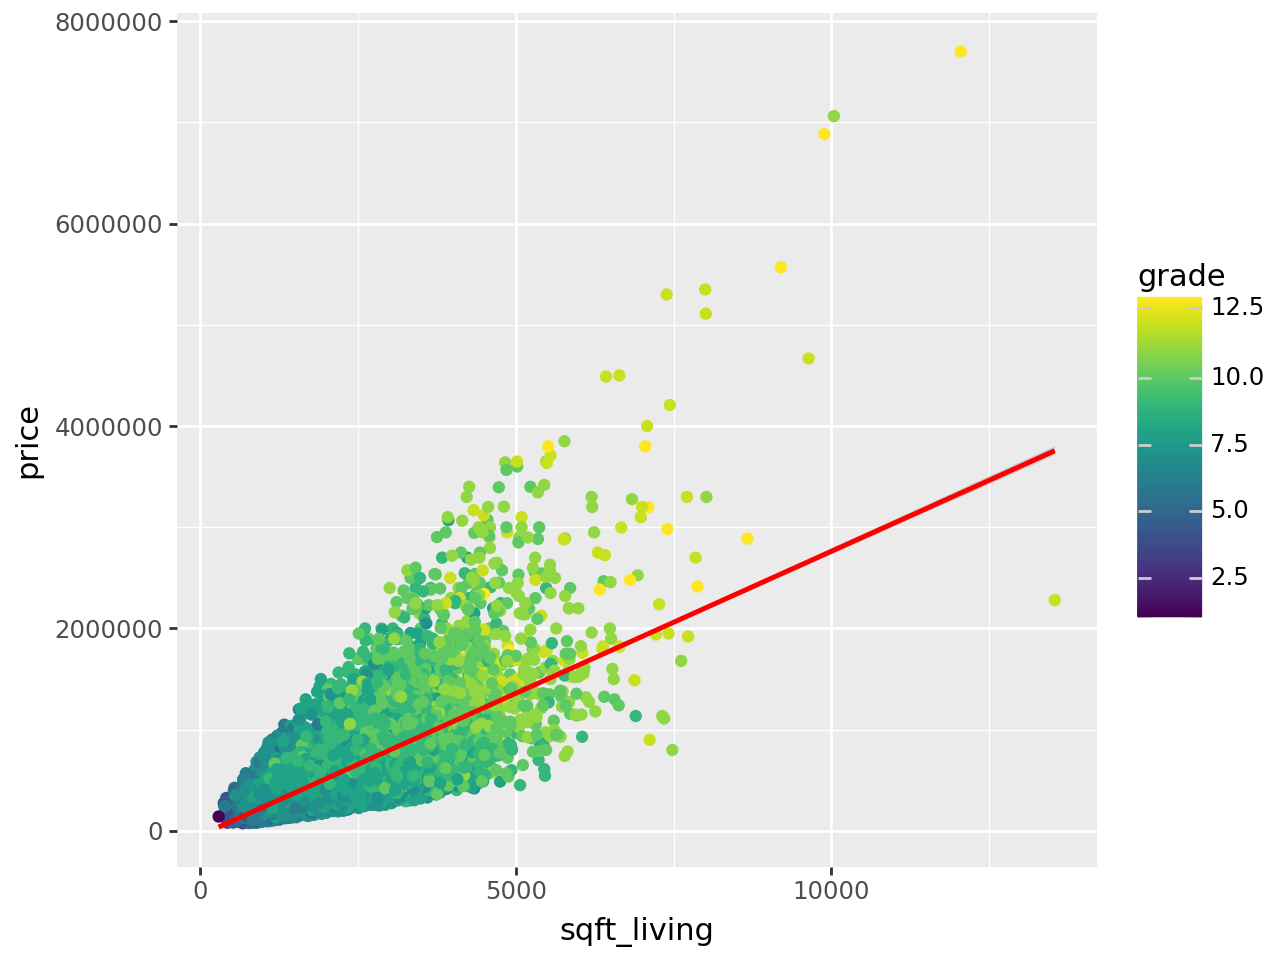

In [17]:
(

    ggplot(kc,aes(x='sqft_living', y = 'price'))

    +geom_point(aes(color = 'grade', )
               )
    +geom_smooth(method='lm', color= 'red')
    
)